In [2]:
#1. Import library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# 2. Load dataset Iris
iris = load_iris()
data = iris.data  # Fitur (sepal length, sepal width, petal length, petal width)
target = iris.target  # Target (kelas: setosa, versicolor, virginica)

# Buat DataFrame untuk kemudahan EDA
iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df['target'] = target

## EDA (Exploratory Data Analysis)

In [4]:
# Statistik Deskriptif
print("Statistik Deskriptif Dataset:")
print(iris_df.describe())

Statistik Deskriptif Dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


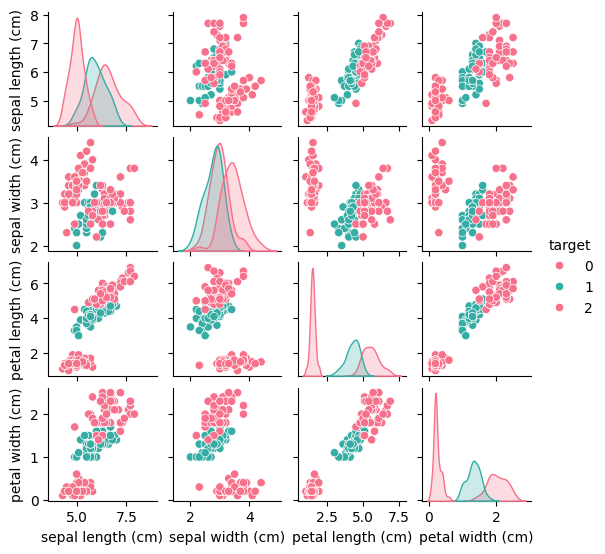

In [13]:
# Visualisasi Pairplot
sns.pairplot(iris_df, hue='target', diag_kind='kde', palette='husl', height=1.4)
plt.show()

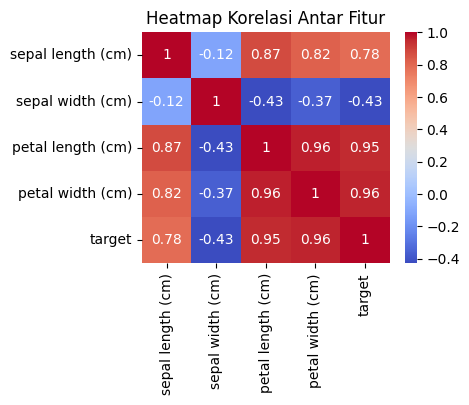

In [7]:
# Heatmap Korelasi
plt.figure(figsize=(4, 3))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

##Preprocessing Data

In [16]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target
)

## Random Forest Model

In [17]:
# Model Default Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Akurasi Random Forest Sebelum Tuning: {rf_accuracy:.4f}")

Akurasi Random Forest Sebelum Tuning: 0.9000


In [18]:
# Hyperparameter Tuning Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Model Terbaik
best_rf_model = grid_search_rf.best_estimator_
rf_tuned_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f"Akurasi Random Forest Setelah Tuning: {rf_tuned_accuracy:.4f}")


Akurasi Random Forest Setelah Tuning: 0.9667


## Decision Tree Model

In [19]:
# Model Default Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print(f"Akurasi Decision Tree Sebelum Tuning: {dt_accuracy:.4f}")

Akurasi Decision Tree Sebelum Tuning: 0.9333


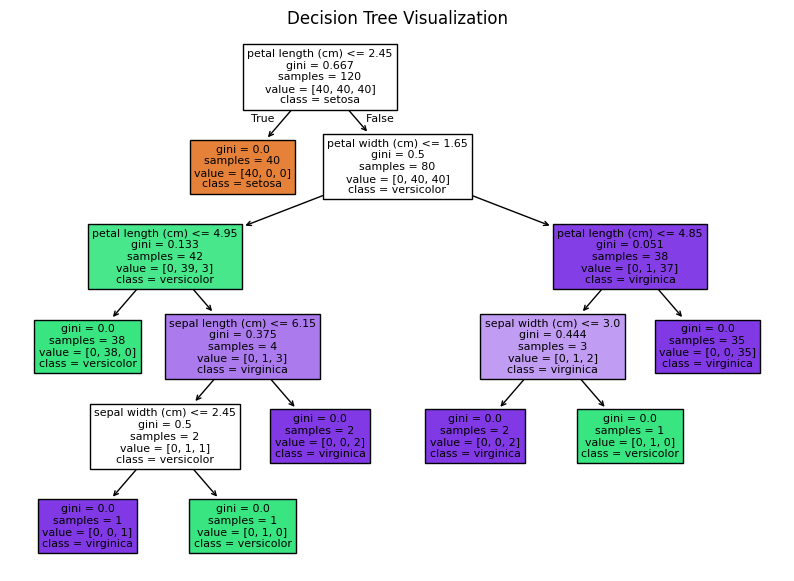

In [23]:
# Visualisasi Decision Tree
plt.figure(figsize=(10, 7))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# Hyperparameter Tuning Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train,y_train)

# Model Terbaik
best_dt_model = grid_search_dt.best_estimator_
dt_tuned_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))
print(f"Akurasi Decision Tree Setelah Tuning: {dt_tuned_accuracy:.4f}")

Akurasi Decision Tree Setelah Tuning: 0.9333


## Evaluasi dan Perbandingan Model

In [ ]:
# Perbandingan Akurasi
print("Perbandingan Akurasi:")
print(f"Random Forest Sebelum Tuning: {rf_accuracy:.4f}")
print(f"Random Forest Setelah Tuning: {rf_tuned_accuracy:.4f}")
print(f"Decision Tree Sebelum Tuning: {dt_accuracy:.4f}")
print(f"Decision Tree Sebelum Tuning: {dt_tuned_accuracy:.4f}")

Perbandingan Akurasi:
Random Forest Sebelum Tuning: 0.9000
Random Forest Setelah Tuning: 0.9667
Decision Tree Sebelum Tuning: 0.9333
Decision Tree Sebelum Tuning: 0.9333


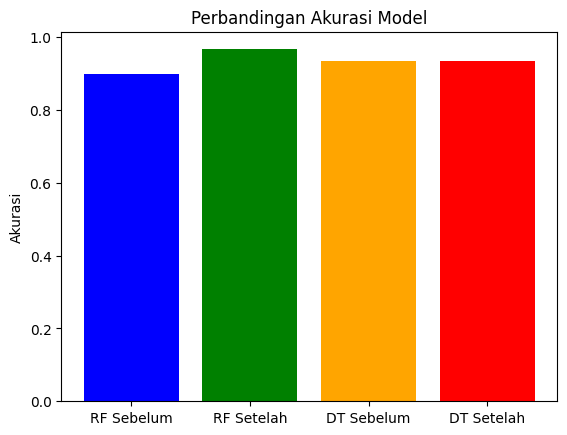

In [ ]:
# Visualisasi Perbandingan
model_names = ['RF Sebelum', 'RF Setelah', 'DT Sebelum', 'DT Setelah']
accuracies = [rf_accuracy, rf_tuned_accuracy, dt_accuracy, dt_tuned_accuracy]

plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.show()

In [ ]:
# Kesimpulan
print("Kesimpulan:")
if rf_tuned_accuracy > dt_tuned_accuracy:
    print("Model Random Forest setelah tuning memiliki performa terbaik.")
else:
    print("Model Decision Tree steelah tuning memiliki performa terbaik.")

Kesimpulan:
Model Random Forest setelah tuning memiliki performa terbaik.
